In [2]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [7]:
beta_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/"

In [8]:
flips_filename = paste0(beta_dir, "eqtl_with_flip_sign.csv")
flips_df = read.csv(flips_filename, row.names = 1)
head(flips_df,2)

,beta_G,n
ABHD12B-14_51328222_C_T,-0.10783378,0.2393439
ADSL-22_40757228_A_C,0.09485572,0.6827107


In [9]:
## load single-cell eQTL genetic effects due to GxC (beta_GxC)
df = read.csv(paste0(beta_dir,"eqtl_tot_genetic_effect_all.txt"), sep="\t",row.names = 1)
colnames(df) = gsub("_-","-",gsub("\\.","-",colnames(df)))
head(df,2)
nrow(df)
ncol(df)

,ABHD10-3_111697439_T_G,ABHD12B-14_51328222_C_T,ACKR2-3_42817129_C_T,ADD2-2_70894426_A_T,ADSL-22_40757228_A_C,AIM1L-1_26673825_C_T,AKAP7-6_131691964_C_A,ALDH7A1-5_126011412_G_A,ANKRD18B-9_33524775_C_A,APIP-11_34905987_T_C,...,YWHAE-17_1246420_G_A,ZBBX-3_167080934_T_G,ZC3HAV1-7_138730361_T_C,ZFR2-19_3840157_C_T,ZG16B-16_2871121_T_C,ZNF423-16_49599995_C_G,ZNF552-19_58315273_G_A,ZNF738-19_21474173_G_A,ZNF77-19_2936535_G_A,ZP3-7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


[1] 8352

[1] 213

In [11]:
df_pcs = read.csv("/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_tsne.csv", row.names=1)

In [12]:
head(df_pcs,2)

,tSNE1,tSNE2,condition
HPSI0714i-iudw_1--DA--d30--0,-13.756691,32.71191,d30
HPSI0714i-iudw_1--DA--d30--1,4.620292,31.43719,d30


In [13]:
cells0 = rownames(df)
df_pcs = df_pcs[cells0,]

In [14]:
# load persistent genetic effects (shared across all cells, beta_G)
df0 = read.csv(paste0(beta_dir,"eqtl_persistent_genetic_effect_all.txt"), sep="\t",row.names = 1)
rownames(df0) = gsub("\\.","-",rownames(df0))
head(df0)
nrow(df0)

,beta_G
ABHD10-3_111697439_T_G,0.30340827
ABHD12B-14_51328222_C_T,-0.10783378
ACKR2-3_42817129_C_T,-0.09692314
ADD2-2_70894426_A_T,-0.14525581
ADSL-22_40757228_A_C,0.09485572
AIM1L-1_26673825_C_T,0.04175069


[1] 213

In [24]:
df1 = df[,colnames(df) %in% gsub("\\.","-",rownames(flips_df))]
genes = colnames(df1)
genes = genes[93]
length(genes)
genes

[1] 1

[1] "ZNF738-19_21474173_G_A"

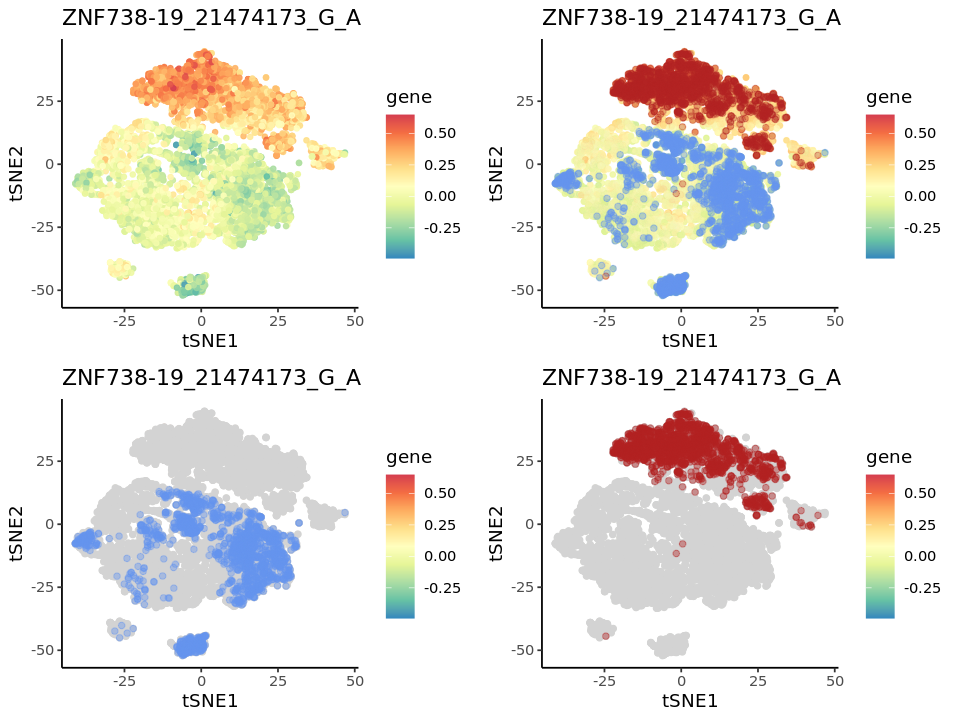

In [26]:
options(repr.plot.width = 8, repr.plot.height = 6)
for (gene in genes){
    df_to_plot0 = cbind(df_pcs[,c("tSNE1","tSNE2")], data.frame(gene = df0[gene,]+df1[,gene]))
    p = ggplot(df_to_plot0, aes(x = tSNE1, y = tSNE2, col = gene)) + geom_point(alpha = 0.9, size = 1.2) 
    p = p + ggtitle(gene)
    p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
    
    qts = quantile(df_to_plot0$gene, probs = c(0.2, 0.8))
    bottom_pseudocells = rownames(df_to_plot0[df_to_plot0$gene < qts[1],])
    top_pseudocells = rownames(df_to_plot0[df_to_plot0$gene > qts[2],])

    p0 = p + geom_point(alpha = 0.05) 
    p0 = p0 + geom_point(col="cornflowerblue", alpha = 0.4, data = df_to_plot0[bottom_pseudocells,])
    p0 = p0 + geom_point(col="firebrick", alpha = 0.3, data = df_to_plot0[top_pseudocells,])
    
    p1 = p + geom_point(col="lightgrey") 
    p1 = p1 + geom_point(col="cornflowerblue", alpha = 0.4, data = df_to_plot0[bottom_pseudocells,])
    
    p2 = p + geom_point(col="lightgrey") 
    p2 = p2 + geom_point(col="firebrick", alpha = 0.4, data = df_to_plot0[top_pseudocells,]) 
    
    print(plot_grid(p, p0, p1, p2, ncol=2))
    
}

In [28]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF11A_tSNE.pdf"), width=8, height=6)
print(plot_grid(p, p0, p1, p2, ncol=2))
dev.off()

png 
  2